In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(sum(map(ord, "aesthetics")))

TypeError: Cannot cast array from dtype('O') to dtype('int64') according to the rule 'safe'

In [3]:
#Lets load data from train and test datasets
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

In [4]:
## How many users are in training set and test set
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [5]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

In [6]:
# Remove ID's since now we are not interested in making predictions
# As of nw don't delete
users.drop('id',axis=1, inplace=True)

users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


## Untouched missing data 
 #### Viewing the data: gender column has certain values being '-unknown-'. Lets transform these values into NaN.
    

In [7]:
users.gender.replace('-unknown-', np.nan, inplace=True)

In [8]:
## How much data we are missing?
## Compute NaN percentage of each feature.
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

In [9]:
## age
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [10]:
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


In [11]:
users[users.age > 122]['age'].describe()
## seems cause due to appearance of 2014 - wrong input

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [12]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

#### Summary: The young users seems to be under an acceptable range being the 50% of those users above 16 years old. We need to hande the outliers. Simple solution set an acceptable range and put others as NaN.


In [13]:
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

## Now, lets focus on CATEGORICAL data types

In [14]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [15]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [16]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105,2009-12-08


## Data Visualization

#### [1] Gender

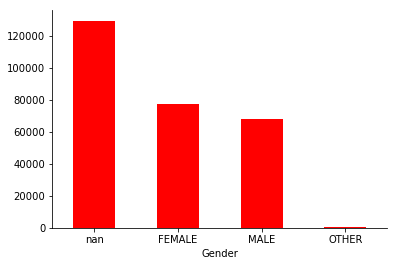

In [17]:

users.gender.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Gender')
sns.despine()

### Is there any gender preferences when travelling?


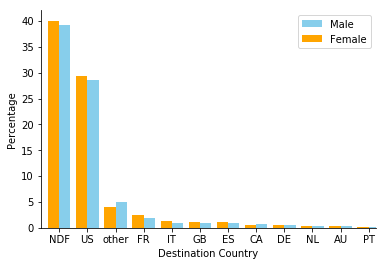

In [18]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='skyblue', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='orange', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

#### Summary: no big difference between genders, but we find relative destination frequency of the countries.

### [2] Age

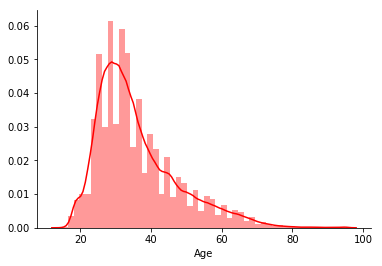

In [19]:
sns.distplot(users.age.dropna(), color='red')
plt.xlabel('Age')
sns.despine()

### Summary: The common age to travel is between 25 and 40-45.
   #### How about older people, do they travel in a different way?
   #### Lets take arbitrary age (45) and split into two groups.
    

In [20]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinat
ions = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='skyblue', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='lightgreen', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

NameError: name 'older_destinat' is not defined

### Summary: 
    
   #### The young people tends to stay in the US, and the older people choose to travel outside the country.
   #### But there are no big differences.
   #### Remember we do not have 42% of the ages.
    

    

### [3] Dates

#### plot number of user accounts created over time


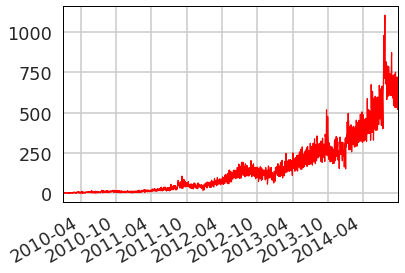

In [21]:

sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')


### Summary: 
#### We find how fast travel agency has grown over the last few years. 
#### Does this correlate with the date when the user was active for the first time? 
#### It should be very similar, so doing this is a way to check the data!


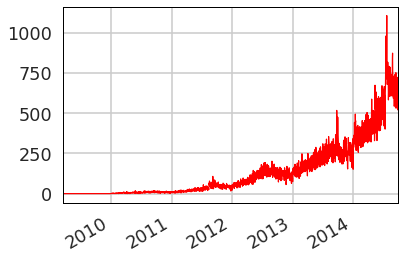

In [22]:
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')

### Summary: 
   #### We see almost same results as date_account_created.
   #### Lets notice the small peaks by digging into the peaks.
    

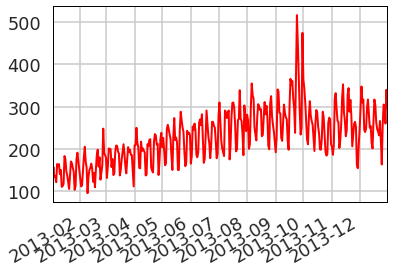

In [23]:
## lets select 2013 year

users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='red')
plt.show()


### Summary:
  ####  Small pattern - some peaks at same distance
  ####  Lets look more closely
    

In [24]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

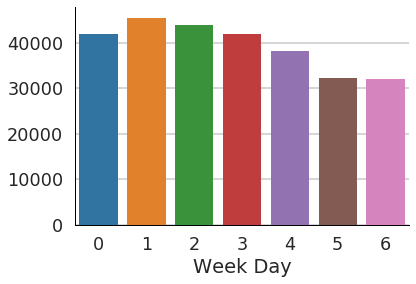

In [25]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

### HW - Can you find some distinctions between 'date_first_active' and 'date_account_created' relating to 'country_destination'?

##### Ask more questions... solve

### HW - Try making plots about devices and signups
### HW - Work on other attributes also

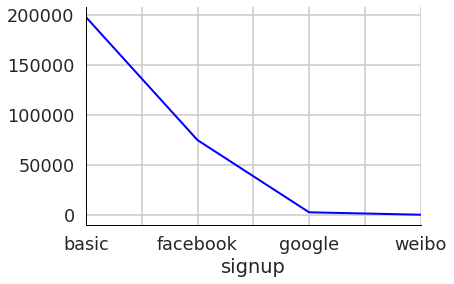

In [92]:
users.signup_method.value_counts().plot(kind='line', linewidth=2, color='blue')
plt.xlabel('signup')
sns.despine()

1. most coomon used method of signup is basic method
2. least common method is weibo

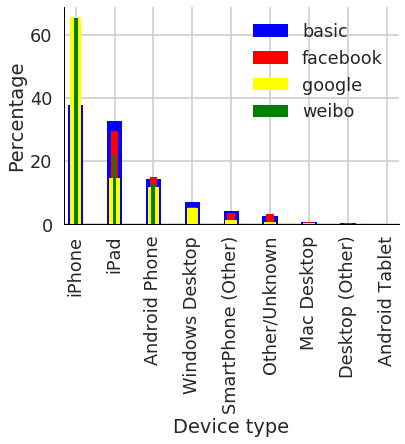

In [93]:
basic = sum(users['signup_method'] =='basic')
facebook= sum(users['signup_method'] == 'facebook')
google = sum(users['signup_method'] == 'google')
weibo = sum(users['signup_method'] == 'weibo')



a= users.loc[users['signup_method'] =='basic', 'first_device_type'].value_counts() /basic * 100
b= users.loc[users['signup_method'] =='facebook', 'first_device_type'].value_counts() /facebook * 100
c= users.loc[users['signup_method'] =='google', 'first_device_type'].value_counts() /google * 100
d= users.loc[users['signup_method'] =='weibo', 'first_device_type'].value_counts() /weibo * 100


a.plot(kind='bar', width=0.4, color='blue',  label='basic')
b.plot(kind='bar', width=0.2, color='red',  label='facebook')
c.plot(kind='bar', width=0.3, color='yellow', label='google')
d.plot(kind='bar', width=0.1, color='green', label='weibo')

plt.legend()
plt.xlabel('Device type')
plt.ylabel('Percentage')

sns.despine()
plt.show()

1.Use of weibo and google in iphone for signup is the maximum. It decreases for iPad, android phone and so on. sign up method gor Android table is negligible

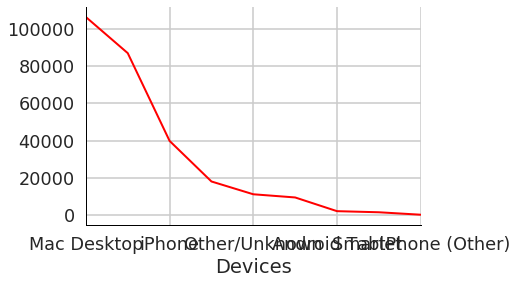

In [94]:
users.first_device_type.value_counts().plot(kind='line', linewidth=2, color='red')
plt.xlabel('Devices')
sns.despine()

1. most common used debice is mac desktop followed by iphone and others

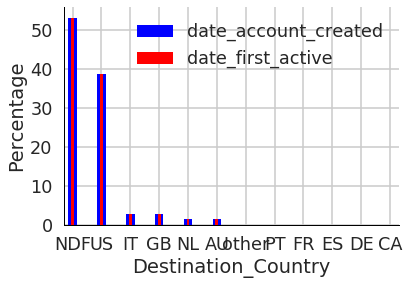

In [95]:
date_2013 = sum(users['date_account_created'] == pd.to_datetime(2013, format='%Y'))
date_first_2013 = sum(users['date_first_active'] == pd.to_datetime(2013, format='%Y'))

a2013= users.loc[users['date_account_created'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() /date_2015 * 100
b2013= users.loc[users['date_first_active'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() /date_first_2015 * 100

a2013.plot(kind='bar', width=0.3, color='blue', label='date_account_created', rot=0)
b2013.plot(kind='bar', width=0.1, color='red', label='date_first_active', rot=0)

plt.legend()
plt.xlabel('Destination_Country')
plt.ylabel('Percentage')
sns.despine()
plt.show()

1. It is clear from the graph that for year 2013 date first created and date account created are almost equal

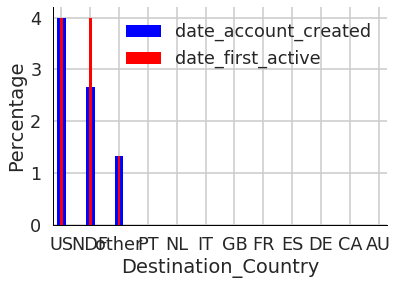

In [96]:
date_2011 = sum(users['date_account_created'] == pd.to_datetime(2011, format='%Y'))
date_first_2011 = sum(users['date_first_active'] == pd.to_datetime(2011, format='%Y'))

a2011= users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() /date_2015 * 100
b2011= users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() /date_first_2015 * 100

a2011.plot(kind='bar', width=0.3, color='blue', label='date_account_created', rot=0)
b2011.plot(kind='bar', width=0.1, color='red', label='date_first_active', rot=0)

plt.legend()
plt.xlabel('Destination_Country')
plt.ylabel('Percentage')
sns.despine()
plt.show()

1.It is clear from the graph that for year 2011 date first created and date account created are almost equal for other countries except for NDF where it varies visibly

# Ways to fill issing data are:

    Filling with average value
    Using global constant
    Deleting the value



In [97]:
average_age = sum(users.age) / len(users.age)
print("Average_age:", average_age )

Average_age: 20.3654367494


1. The average age of 20.36 can be used to fill the missing age values
2. Any global constant can be taken like ,const= 30 years and can be filled into missing values  